## 🔴 Task 35-> Convolutional Neural Networks (CNNs) 

In [22]:
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Input
from tensorflow.keras.optimizers import Adam
import matplotlib.pyplot as plt
import cv2
import numpy as np

## Load Data and split them into train test sets & Normalize the data

In [3]:
(X_train, y_train), (X_test, y_test) = cifar10.load_data()
X_train = X_train / 255.0
X_test = X_test / 255.0

## Introduce the model

In [4]:
model = Sequential()
model.add(Input(shape=(32, 32, 3)))
model.add(Conv2D(32, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))

## Compile the model altogether

In [5]:
model.compile(optimizer=Adam(learning_rate=0.001), loss='sparse_categorical_crossentropy', metrics=['accuracy'])

## Train The model

In [6]:
model.fit(X_train, y_train, epochs=5, batch_size=32, validation_data=(X_test, y_test))

Epoch 1/5


2024-08-10 00:00:55.593777: W external/local_tsl/tsl/framework/cpu_allocator_impl.cc:83] Allocation of 614400000 exceeds 10% of free system memory.


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 32s 19ms/step - accuracy: 0.3372 - loss: 1.7907 - val_accuracy: 0.5336 - val_loss: 1.2811
Epoch 2/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 19ms/step - accuracy: 0.5738 - loss: 1.2027 - val_accuracy: 0.6044 - val_loss: 1.1139
Epoch 3/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.6369 - loss: 1.0248 - val_accuracy: 0.6611 - val_loss: 0.9833
Epoch 4/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.6799 - loss: 0.9056 - val_accuracy: 0.6731 - val_loss: 0.9388
Epoch 5/5
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 29s 18ms/step - accuracy: 0.7106 - loss: 0.8222 - val_accuracy: 0.6835 - val_loss: 0.9083


## Check Accuracy and lose in training the model

In [7]:
loss, accuracy = model.evaluate(X_test, y_test)
print('Test loss:', loss)
print('Test accuracy:', accuracy)

313/313 ━━━━━━━━━━━━━━━━━━━━ 2s 6ms/step - accuracy: 0.6857 - loss: 0.9048
Test loss: 0.908271849155426
Test accuracy: 0.6834999918937683


## Sharpen the image through Gaussian Blur method and display both original and sharpened

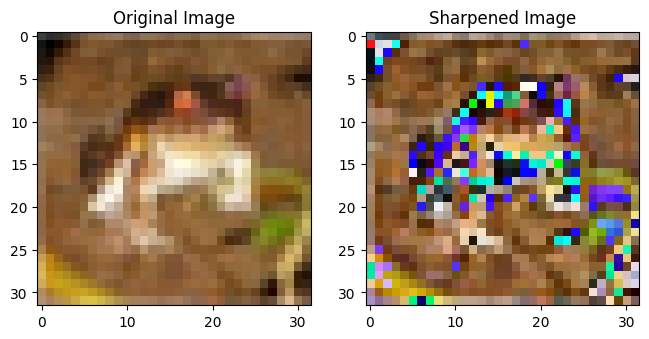

In [23]:
sharpened_images = []

for i in range(X_train.shape[0]):
    image = X_train[i]
    
    gaussian = cv2.GaussianBlur(image, (5, 5), 2.0)
    sharpened = cv2.addWeighted(image, 2.5, gaussian, -1.5, 0)
    
    sharpened = (sharpened * 255).astype(np.uint8)
    
    sharpened_images.append(sharpened)

sharpened_images_array = np.array(sharpened_images)

plt.figure(figsize=(12, 6))

plt.subplot(1, 3, 1)
plt.imshow(X_train[0])
plt.title('Original Image')

plt.subplot(1, 3, 2)
plt.imshow(sharpened_images_array[0])
plt.title('Sharpened Image')

plt.show()
